In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
column_names=['tweetid','entity','sentiment','tweet']
df=pd.read_csv('DATASETS/twitter_training.csv', names=column_names)
df.head()

,tweetid,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


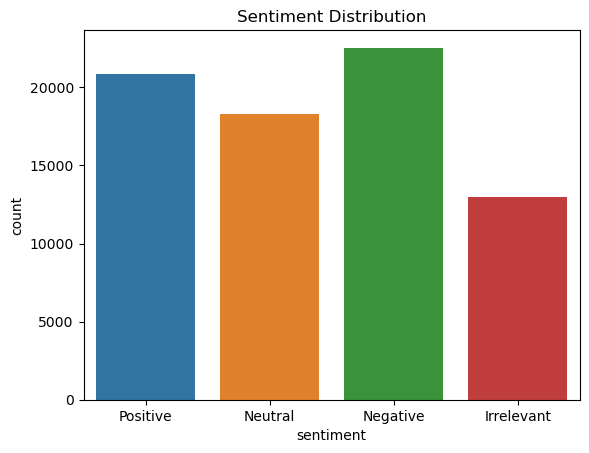

In [11]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

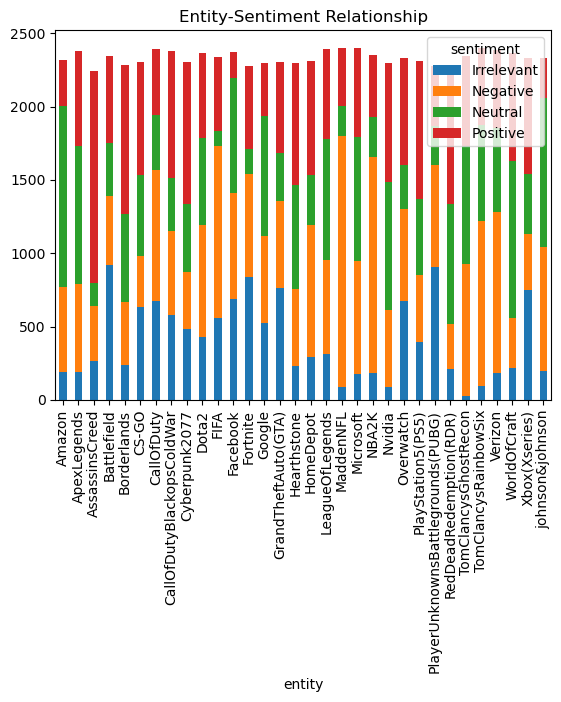

In [12]:
# finding the entity and sentiment relationship

entity_sentiment_counts = df.groupby(['entity', 'sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Entity-Sentiment Relationship')
plt.show()

### Wordcloud for different sentiment 

In [13]:
!pip install wordcloud

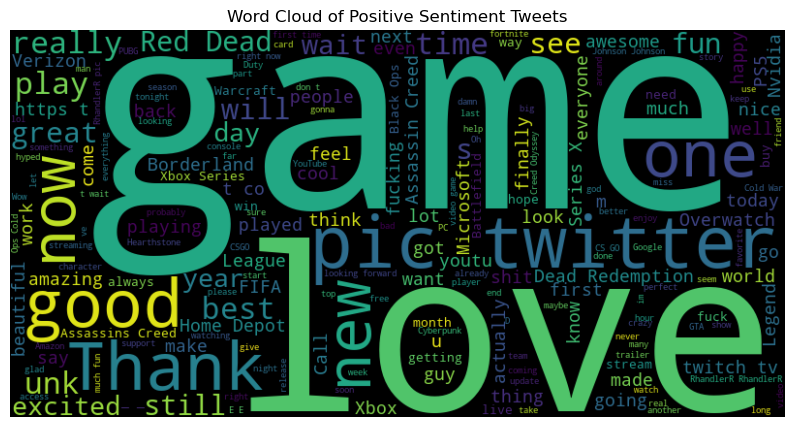

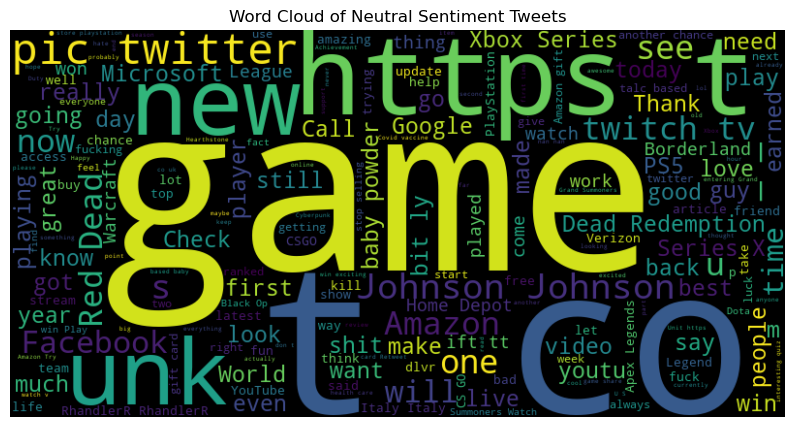

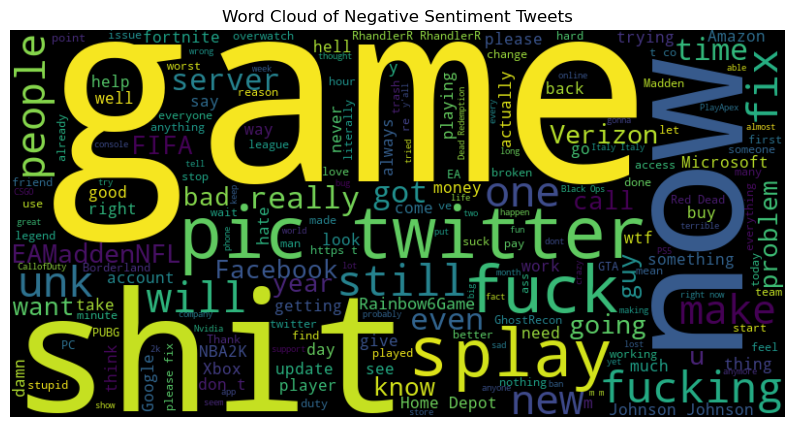

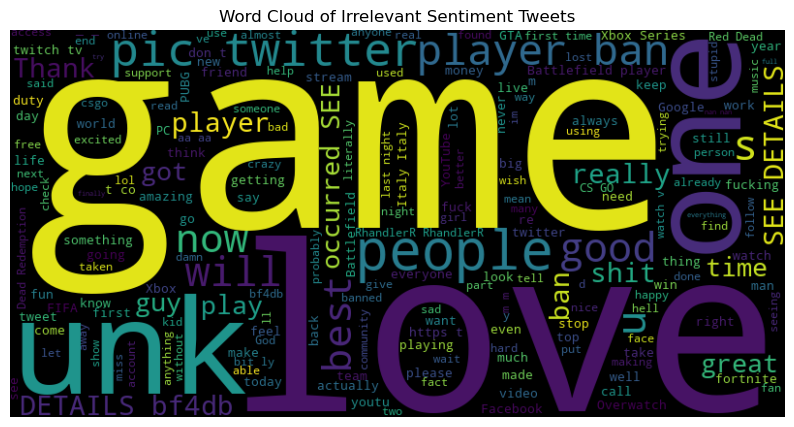

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment):
    # Filtering tweets of the specified sentiment and extract the 'tweet' column
    tweets = df[df["sentiment"] == sentiment]["tweet"]
    
    # Converting the tweets to strings
    tweets = tweets.astype(str)
    
    # Joining all the tweets into a single string
    text = ' '.join(tweets)
    
    # Creating a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Displaying the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {sentiment} Sentiment Tweets')
    plt.show()

# Iterating over the unique sentiments in the DataFrame
sentiments = df['sentiment'].unique()
for sentiment in sentiments:
    generate_wordcloud(sentiment)

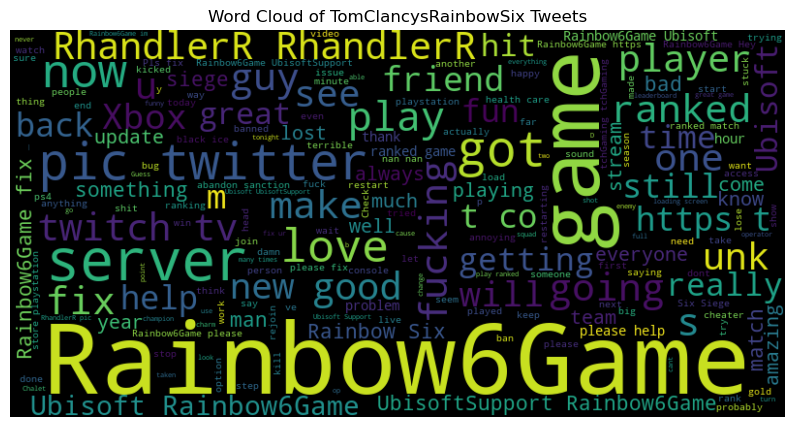

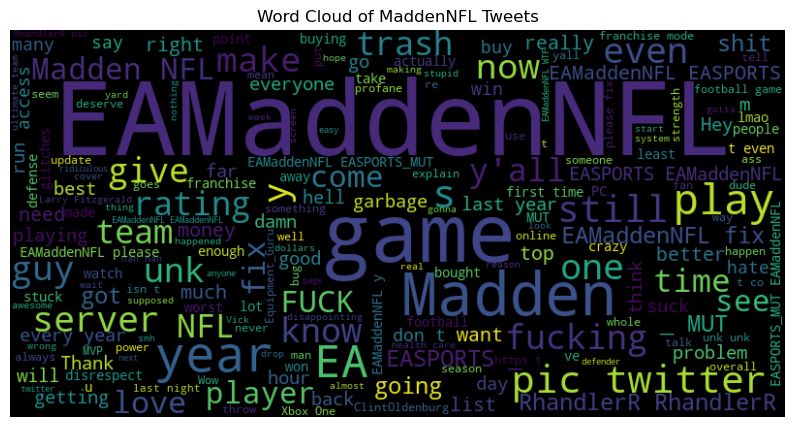

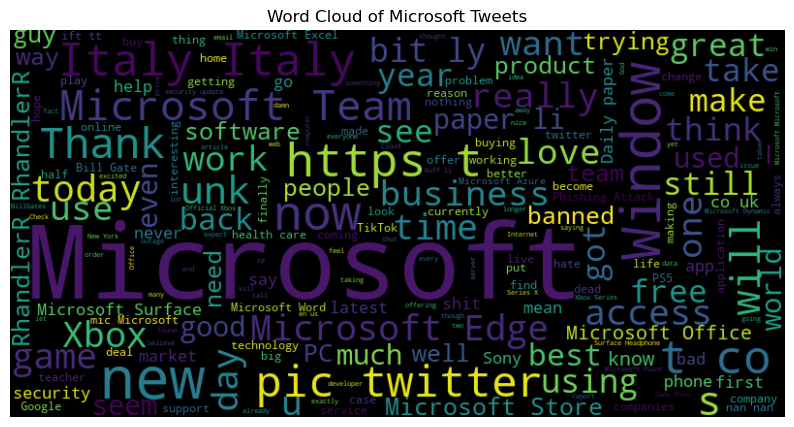

In [15]:
# Calculating the counts of each entity
entity_counts = df['entity'].value_counts()

# Selecting the top three entities with the highest counts
top_entities = entity_counts.head(3).index.tolist()

# Iterating over the top entities and generate word clouds
for entity in top_entities:
    # Filtering tweets associated with the current entity and extract the 'tweet' column
    tweets = df[df['entity'] == entity]['tweet']
    
    # Converting the tweets to strings
    tweets = tweets.astype(str)
    
    # Joining all the tweets into a single string
    text = ' '.join(tweets)
    
    # Creating a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {entity} Tweets')
    plt.show()

### Data Preprocessing and Tokenization

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'tweet' column
df['tweet']=df['tweet'].astype('str')
df['clean_text'] = df['tweet'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to C:\Users\Valeska
[nltk_data]     Dsouza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Valeska
[nltk_data]     Dsouza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Model training and evaluation 


#### Support Vector Classification (SVC)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and validation (testing) sets
X_train, X_val, y_train, y_val = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Training a Support Vector Machine (SVM) classifier
svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)

# Making predictions on the validation set
y_pred = svm.predict(X_val_vec)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

Accuracy: 0.8405971748008302
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.87      0.78      0.82      2592
    Negative       0.86      0.88      0.87      4519
     Neutral       0.85      0.80      0.83      3596
    Positive       0.80      0.87      0.83      4230

    accuracy                           0.84     14937
   macro avg       0.84      0.83      0.84     14937
weighted avg       0.84      0.84      0.84     14937



Accuracy: 0.8405971748008302


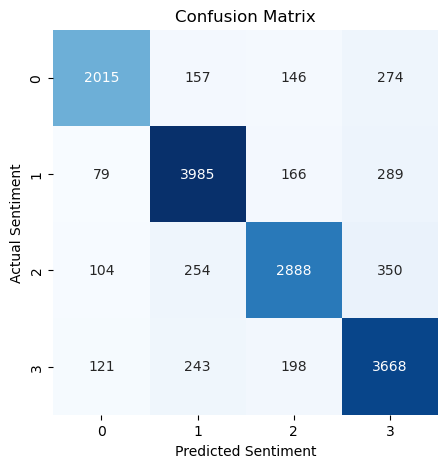

In [38]:
from sklearn.metrics import confusion_matrix

# Creating a confusion matrix
cm = confusion_matrix(y_val, y_pred)

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm,annot=True,square=True,cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

# Split the data
X_train, X_val, y_train, y_val = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train a Logistic Regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)

# Make predictions
y_pred = lr.predict(X_val_vec)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

Accuracy: 0.6945169712793734
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.69      0.53      0.60      2592
    Negative       0.74      0.78      0.76      4519
     Neutral       0.68      0.64      0.66      3596
    Positive       0.66      0.75      0.70      4230

    accuracy                           0.69     14937
   macro avg       0.69      0.68      0.68     14937
weighted avg       0.69      0.69      0.69     14937



Accuracy: 0.6945169712793734


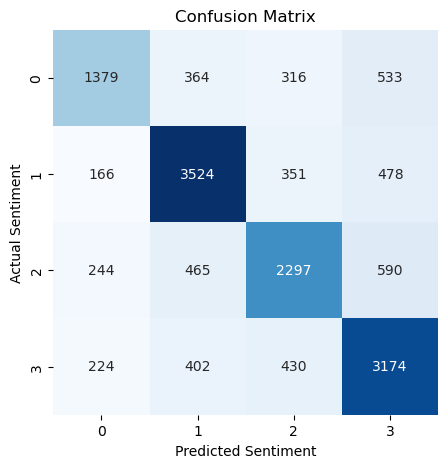

In [40]:
from sklearn.metrics import confusion_matrix

# Creating a confusion matrix
cm = confusion_matrix(y_val, y_pred)

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm,annot=True,square=True,cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()